In [1]:
!pip install pyLDAvis
!pip install pandas --upgrade

  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.0
    Uninstalling pandas-1.3.0:
      Successfully uninstalled pandas-1.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import plotly.express as px
import re
from wordcloud import WordCloud
import nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
!pip install pandas==1.3.0

  Using cached pandas-1.3.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (10.8 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.0 which is incompatible.


In [16]:
df=pd.read_csv('tweets2.csv',error_bad_lines=False, engine="python", encoding="ISO-8859-1")
df.head()
df.isnull().sum()
df.columns
df.head()
content = df['renderedContent'].tolist()
df.head()
#X_train.drop(X_train.columns[x], axis='columns')
df = df.drop(['Unnamed: 0','id','conversationId','inReplyToTweetId','inReplyToUser','mentionedUsers','cashtags','hashtags','sourceLabel','inReplyToTweetId'], axis= 'columns')
df = df.drop(['sourceUrl','source'], axis = 'columns')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version.





,Number,url,date,content,renderedContent,user,replyCount,retweetCount,likeCount,quoteCount,lang,coordinates,place
0,1,https://twitter.com/JoanLeaming/status/1475631...,2021-12-28 00:56:29+00:00,@JonesHowdareyou @adamajacoby ð±- (this is m...,@JonesHowdareyou @adamajacoby ð±- (this is m...,"{'username': 'JoanLeaming', 'id': 320148151, '...",0.0,0,1,0,en,"{'longitude': 134.18663872, 'latitude': -32.80...","{'fullName': 'Streaky Bay, South Australia', '..."
1,2,https://twitter.com/Sal_N_Cobbers/status/14750...,2021-12-26 09:15:40+00:00,@david_heath True Daveâ¦I just got lost in a ...,@david_heath True Daveâ¦I just got lost in a ...,"{'username': 'Sal_N_Cobbers', 'id': 1381214332...",0.0,0,0,0,en,"{'longitude': 140.961681976682, 'latitude': -3...","{'fullName': 'Victoria, Australia', 'name': 'V..."
2,3,https://twitter.com/MrVegemite/status/14749866...,2021-12-26 06:13:21+00:00,@EastBayChris I had 24 hours of angst followed...,@EastBayChris I had 24 hours of angst followed...,"{'username': 'MrVegemite', 'id': 1187535693913...",1.0,0,1,0,en,"{'longitude': 152.668522848, 'latitude': -27.7...","{'fullName': 'Brisbane, Queensland', 'name': '..."
3,4,https://twitter.com/Dvdcallaghan/status/147372...,2021-12-22 18:58:24+00:00,Dont know why all the angst re our PM. Scotty ...,Dont know why all the angst re our PM. Scotty ...,"{'username': 'Dvdcallaghan', 'id': 312347597, ...",0.0,0,0,0,en,"{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M..."
4,5,https://twitter.com/MelissaKaulfuss/status/147...,2021-12-21 23:59:07+00:00,Iâd like to think I donât need Facebook to...,Iâd like to think I donât need Facebook to...,"{'username': 'MelissaKaulfuss', 'id': 62370636...",1.0,0,15,0,en,"{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M..."


In [17]:
df['content1'] = content
df.head()
places = df['place'].tolist()
df['places1'] = places
df.head()

dict_places = []
remove = []
#df['dict_places'] = dict_places
for i,j in enumerate(places):
    try:
        sen = ast.literal_eval(j)
        dict_places.append(sen)
    except:
        remove.append(i)
        print(f'Error ocuurs at {i}th position')


remove
df.drop(df.index[remove], inplace=True)
df

Error ocuurs at 6322th position
Error ocuurs at 24260th position
Error ocuurs at 25068th position
Error ocuurs at 31244th position
Error ocuurs at 33608th position
Error ocuurs at 33701th position
Error ocuurs at 33759th position
Error ocuurs at 33892th position
Error ocuurs at 33959th position
Error ocuurs at 33971th position
Error ocuurs at 34017th position
Error ocuurs at 34083th position
Error ocuurs at 34158th position
Error ocuurs at 34691th position
Error ocuurs at 34741th position
Error ocuurs at 34930th position
Error ocuurs at 34980th position
Error ocuurs at 35053th position
Error ocuurs at 35114th position
Error ocuurs at 35118th position
Error ocuurs at 35199th position
Error ocuurs at 39968th position
Error ocuurs at 67700th position
Error ocuurs at 67944th position
Error ocuurs at 70600th position
Error ocuurs at 82705th position
Error ocuurs at 83269th position
Error ocuurs at 85625th position
Error ocuurs at 98384th position
Error ocuurs at 114388th position
Error ocuu

,Number,url,date,content,renderedContent,user,replyCount,retweetCount,likeCount,quoteCount,lang,coordinates,place,content1,places1
0,1,https://twitter.com/JoanLeaming/status/1475631...,2021-12-28 00:56:29+00:00,@JonesHowdareyou @adamajacoby ð±- (this is m...,@JonesHowdareyou @adamajacoby ð±- (this is m...,"{'username': 'JoanLeaming', 'id': 320148151, '...",0.0,0,1,0,en,"{'longitude': 134.18663872, 'latitude': -32.80...","{'fullName': 'Streaky Bay, South Australia', '...",@JonesHowdareyou @adamajacoby ð±- (this is m...,"{'fullName': 'Streaky Bay, South Australia', '..."
1,2,https://twitter.com/Sal_N_Cobbers/status/14750...,2021-12-26 09:15:40+00:00,@david_heath True Daveâ¦I just got lost in a ...,@david_heath True Daveâ¦I just got lost in a ...,"{'username': 'Sal_N_Cobbers', 'id': 1381214332...",0.0,0,0,0,en,"{'longitude': 140.961681976682, 'latitude': -3...","{'fullName': 'Victoria, Australia', 'name': 'V...",@david_heath True Daveâ¦I just got lost in a ...,"{'fullName': 'Victoria, Australia', 'name': 'V..."
2,3,https://twitter.com/MrVegemite/status/14749866...,2021-12-26 06:13:21+00:00,@EastBayChris I had 24 hours of angst followed...,@EastBayChris I had 24 hours of angst followed...,"{'username': 'MrVegemite', 'id': 1187535693913...",1.0,0,1,0,en,"{'longitude': 152.668522848, 'latitude': -27.7...","{'fullName': 'Brisbane, Queensland', 'name': '...",@EastBayChris I had 24 hours of angst followed...,"{'fullName': 'Brisbane, Queensland', 'name': '..."
3,4,https://twitter.com/Dvdcallaghan/status/147372...,2021-12-22 18:58:24+00:00,Dont know why all the angst re our PM. Scotty ...,Dont know why all the angst re our PM. Scotty ...,"{'username': 'Dvdcallaghan', 'id': 312347597, ...",0.0,0,0,0,en,"{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M...",Dont know why all the angst re our PM. Scotty ...,"{'fullName': 'Melbourne, Victoria', 'name': 'M..."
4,5,https://twitter.com/MelissaKaulfuss/status/147...,2021-12-21 23:59:07+00:00,Iâd like to think I donât need Facebook to...,Iâd like to think I donât need Facebook to...,"{'username': 'MelissaKaulfuss', 'id': 62370636...",1.0,0,15,0,en,"{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M...",Iâd like to think I donât need Facebook to...,"{'fullName': 'Melbourne, Victoria', 'name': 'M..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228869,228870,https://twitter.com/rizal_muhtaufiq/status/122...,2020-01-26 17:15:49+00:00,"Another day, another Insomnia","Another day, another Insomnia","{'username': 'rizal_muhtaufiq', 'id': 11319506...",0.0,0,0,0,en,"{'longitude': 113.6839379, 'latitude': -8.222226}","{'fullName': 'Sumbersari, Indonesia', 'name': ...","Another day, another Insomnia","{'fullName': 'Sumbersari, Indonesia', 'name': ..."
228870,228871,https://twitter.com/AustralasianEdu/status/122...,2020-01-26 17:02:08+00:00,@CavillJyckel Twitter is great for insomnia ð,@CavillJyckel Twitter is great for insomnia ð,"{'username': 'AustralasianEdu', 'id': 90764565...",1.0,0,3,0,en,"{'longitude': 150.520928608, 'latitude': -34.1...","{'fullName': 'Sydney, New South Wales', 'name'...",@CavillJyckel Twitter is great for insomnia ð,"{'fullName': 'Sydney, New South Wales', 'name'..."
228871,228872,https://twitter.com/Nickey_is_Bored/status/122...,2020-01-26 00:33:40+00:00,#tired. Had bad night of #insomnia. Just woke ...,#tired. Had bad night of #insomnia. Just woke ...,"{'username': 'Nickey_is_Bored', 'id': 28202238...",0.0,0,0,0,en,"{'longitude': 150.520928608, 'latitude': -34.1...","{'fullName': 'Sydney, New South Wales', 'name'...",#tired. Had bad night of #insomnia. Just woke ...,"{'fullName': 'Sydney, New South Wales', 'name'..."
228872,228873,https://twitter.com/YASMINSCOTTREAL/status/122...,2020-01-25 18:57:26+00:00,Waiting for the 6am sunrise show by @NITV it i...,Waiting for the 6am sunrise show by @NITV it i...,"{'username': 'YASMINSCOTTREAL', 'id

In [6]:
#df.drop(df.index[pos], inplace=True)
#df.apply(lambda col: col.drop_duplicaes().reset_index(drop=True))

df['places1'] = dict_places
df['places1'].head()
df.head()

#getting cities from dict_places
cities = []
for index in dict_places:
  cities.append(index['name'])

cities


['Streaky Bay',
 'Victoria',
 'Brisbane',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Indonesia',
 'Kuta',
 'Merimbula',
 'Melbourne',
 'New South Wales',
 'Perth (WA)',
 'Brisbane',
 'Castlemaine',
 'Chatswood',
 'Brisbane',
 'Sydney',
 'Poolside. Hamilton Island',
 'Melbourne',
 'Mount Morgan',
 'Sunshine Coast',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Melbourne',
 'Brisbane',
 'Portarlington',
 'Melbourne',
 'Adelaide',
 'Sydney',
 'Perth (WA)',
 'Castlemaine',
 'Mount Lonarch',
 'Traralgon',
 'Melbourne',
 'Perth (WA)',
 'Sydney',
 'Perth (WA)',
 'Melbourne',
 'Sydney',
 'Canberra',
 'Sydney',
 'Perth (WA)',
 'Tempurejo',
 'Perth (WA)',
 'Brisbane',
 'New South Wales',
 'Kediri',
 'Kediri',
 'Perth (WA)',
 'Perth (WA)',
 'Canberra',
 'Melbourne',
 'Tasmania',
 'Ellenbrook',
 'Brisbane',
 'Brisbane',
 'Canberra',
 'Melbourne',
 'Perth (WA)',
 'Perth (WA)',
 'Melbourne',
 'Townsville',
 'Perth (WA)',
 'Adelaide',
 'Murwillumbah',
 'Sydney',
 'Sydney',


In [7]:
df['cities'] = cities
df

,Number,url,date,content,renderedContent,user,replyCount,retweetCount,likeCount,quoteCount,lang,coordinates,place,content1,places1,cities
0,1,https://twitter.com/JoanLeaming/status/1475631...,2021-12-28 00:56:29+00:00,@JonesHowdareyou @adamajacoby ð±- (this is m...,@JonesHowdareyou @adamajacoby ð±- (this is m...,"{'username': 'JoanLeaming', 'id': 320148151, '...",0.0,0,1,0,en,"{'longitude': 134.18663872, 'latitude': -32.80...","{'fullName': 'Streaky Bay, South Australia', '...",@JonesHowdareyou @adamajacoby ð±- (this is m...,"{'fullName': 'Streaky Bay, South Australia', '...",Streaky Bay
1,2,https://twitter.com/Sal_N_Cobbers/status/14750...,2021-12-26 09:15:40+00:00,@david_heath True Daveâ¦I just got lost in a ...,@david_heath True Daveâ¦I just got lost in a ...,"{'username': 'Sal_N_Cobbers', 'id': 1381214332...",0.0,0,0,0,en,"{'longitude': 140.961681976682, 'latitude': -3...","{'fullName': 'Victoria, Australia', 'name': 'V...",@david_heath True Daveâ¦I just got lost in a ...,"{'fullName': 'Victoria, Australia', 'name': 'V...",Victoria
2,3,https://twitter.com/MrVegemite/status/14749866...,2021-12-26 06:13:21+00:00,@EastBayChris I had 24 hours of angst followed...,@EastBayChris I had 24 hours of angst followed...,"{'username': 'MrVegemite', 'id': 1187535693913...",1.0,0,1,0,en,"{'longitude': 152.668522848, 'latitude': -27.7...","{'fullName': 'Brisbane, Queensland', 'name': '...",@EastBayChris I had 24 hours of angst followed...,"{'fullName': 'Brisbane, Queensland', 'name': '...",Brisbane
3,4,https://twitter.com/Dvdcallaghan/status/147372...,2021-12-22 18:58:24+00:00,Dont know why all the angst re our PM. Scotty ...,Dont know why all the angst re our PM. Scotty ...,"{'username': 'Dvdcallaghan', 'id': 312347597, ...",0.0,0,0,0,en,"{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M...",Dont know why all the angst re our PM. Scotty ...,"{'fullName': 'Melbourne, Victoria', 'name': 'M...",Melbourne
4,5,https://twitter.com/MelissaKaulfuss/status/147...,2021-12-21 23:59:07+00:00,Iâd like to think I donât need Facebook to...,Iâd like to think I donât need Facebook to...,"{'username': 'MelissaKaulfuss', 'id': 62370636...",1.0,0,15,0,en,"{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M...",Iâd like to think I donât need Facebook to...,"{'fullName': 'Melbourne, Victoria', 'name': 'M...",Melbourne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228869,228870,https://twitter.com/rizal_muhtaufiq/status/122...,2020-01-26 17:15:49+00:00,"Another day, another Insomnia","Another day, another Insomnia","{'username': 'rizal_muhtaufiq', 'id': 11319506...",0.0,0,0,0,en,"{'longitude': 113.6839379, 'latitude': -8.222226}","{'fullName': 'Sumbersari, Indonesia', 'name': ...","Another day, another Insomnia","{'fullName': 'Sumbersari, Indonesia', 'name': ...",Sumbersari
228870,228871,https://twitter.com/AustralasianEdu/status/122...,2020-01-26 17:02:08+00:00,@CavillJyckel Twitter is great for insomnia ð,@CavillJyckel Twitter is great for insomnia ð,"{'username': 'AustralasianEdu', 'id': 90764565...",1.0,0,3,0,en,"{'longitude': 150.520928608, 'latitude': -34.1...","{'fullName': 'Sydney, New South Wales', 'name'...",@CavillJyckel Twitter is great for insomnia ð,"{'fullName': 'Sydney, New South Wales', 'name'...",Sydney
228871,228872,https://twitter.com/Nickey_is_Bored/status/122...,2020-01-26 00:33:40+00:00,#tired. Had bad night of #insomnia. Just woke ...,#tired. Had bad night of #insomnia. Just woke ...,"{'username': 'Nickey_is_Bored', 'id': 28202238...",0.0,0,0,0,en,"{'longitude': 150.520928608, 'latitude': -34.1...","{'fullName': 'Sydney, New South Wales', 'name'...",#tired. Had bad night of #insomnia. Just woke ...,"{'fullName': 'Sydney, New South Wales', 'name'...",Sydney
228872,228873,https://twitter.com/YASMINSCOTTREAL/status/122...,2020-01-25 18:57:26+00:00,Waiting for the 6am sunrise show by @NITV it i...,

In [8]:
#cities graph
data_cities = pd.DataFrame(cities, columns=['Cities'])
#data_cities.head()
x = data_cities.groupby('Cities')['Cities'].count()
df1 = pd.DataFrame(x)
df1.columns = ['Count']
df1.reset_index(inplace=True)
df1


,Cities,Count
0,12 Collins Street,1
1,13th Beach,1
2,191 Brighton Road,1
3,276 Flinders St,1
4,3CR Community Radio,4
...,...,...
3388,st michaels college,1
3389,telkom jimbaran,1
3390,the pet friendly cafÃ©,1
3391,timberwood panels,1


In [10]:
#plotting cities vs cities count for mental health tweets
fig = px.bar(df1, x='Cities', y='Count',title= 'City count', color = df1.Cities)
fig.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228839 entries, 0 to 228873
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Number           228839 non-null  int64  
 1   url              228839 non-null  object 
 2   date             228839 non-null  object 
 3   content          228839 non-null  object 
 4   renderedContent  228839 non-null  object 
 5   user             228839 non-null  object 
 6   replyCount       228839 non-null  float64
 7   retweetCount     228839 non-null  object 
 8   likeCount        228839 non-null  object 
 9   quoteCount       228839 non-null  object 
 10  lang             228839 non-null  object 
 11  coordinates      228821 non-null  object 
 12  place            228839 non-null  object 
 13  content1         228839 non-null  object 
 14  places1          228839 non-null  object 
 15  cities           228839 non-null  object 
dtypes: float64(1), int64(1), object(14)
me

In [12]:
#reply count graph
reply = df.groupby('replyCount')['replyCount'].count()
data_reply = pd.DataFrame(reply)
data_reply.columns = ['Freq']
data_reply.reset_index(inplace=True)
data_reply

fig = px.bar(data_reply, x='replyCount', y='Freq', title = 'Reply Count', color_discrete_sequence= ['green']*1)
fig.show()


In [18]:
#like count
like_count = df.groupby('likeCount')['likeCount'].count()
data_like = pd.DataFrame(like_count)
data_like.columns = ['Frequency']
data_like.reset_index(inplace=True)
data_like
fig = px.bar(data_like, x='likeCount', y='Frequency', title = 'Likes Count', color_discrete_sequence=['red']*3)
fig.show()


In [19]:
#retweet data 
retweet = df.groupby('retweetCount')['retweetCount'].count()
df2 = pd.DataFrame(retweet)
df2.columns = ['Frequency']
df2.reset_index(inplace=True)
df2
fig = px.pie(df2, values='Frequency',names = 'retweetCount', title='retweet count')
fig.show()


In [24]:
#final_cleaning_sentences
def preprocessing(text):
    #Removing names, links
    sentence = re.sub(r'@[\w]+', '', text)
    sentence = re.sub(r'https:[\w\W]+','', sentence)
    sentence = re.sub(r'\n', '', sentence)
    sentence = re.sub(r'\n\n', '', sentence)
    sentence = re.sub(r'twitter.com[\w\W]+','', sentence)
    
    #removing emojis
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    sentence = regrex_pattern.sub('', sentence)
    sentence = re.sub(r'#[\w]','', sentence)
    sentence = re.sub(r'([\w]+).([\w]+).([\w]+)/([\w]+)/([\w\W]+)', '', sentence)
    
    return sentence

In [26]:
final_cleaning_sentences = []
for i in content:
    sen = preprocessing(i)
    final_cleaning_sentences.append(sen)


In [27]:
final_cleaning_sentences

['  ð\x9f\x98±- (this is meant to denote shock not existential angst)',
 ' True Daveâ\x80¦I just got lost in a beautiful story amongst all the political angstâ\x98ºï¸\x8fâ\x9d¤ï¸\x8fð\x9f\x90ª',
 ' I had 24 hours of angst followed by a 13 year oldâ\x80\x99s elation. First gaming PC build. ',
 'Dont know why all the angst re our PM. Scotty actually perfectly represents Australian ethos to the world. The embodiment of our corporate middle-management, there is no situation he cannot either avoid or find someone else to hang the blame on!!!',
 'Iâ\x80\x99d like to think I donâ\x80\x99t need Facebook to wrangle a group of peeps together. I have angst ridden lament at times thinking about all the â\x80\x9ceventsâ\x80\x9d Iâ\x80\x99m probably missing out on because I donâ\x80\x99t have an account &amp; people just donâ\x80\x99t think to ask anyone outside of that shitty platform ð\x9f\x92\x99',
 "  Overall for me it's much improved. I think this is festive season angst. I just want this next 

In [30]:
df.reset_index()

,index,Number,url,date,content,renderedContent,user,replyCount,retweetCount,likeCount,quoteCount,lang,coordinates,place,content1,places1
0,0,1,https://twitter.com/JoanLeaming/status/1475631...,2021-12-28 00:56:29+00:00,@JonesHowdareyou @adamajacoby ð±- (this is m...,@JonesHowdareyou @adamajacoby ð±- (this is m...,"{'username': 'JoanLeaming', 'id': 320148151, '...",0.0,0,1,0,en,"{'longitude': 134.18663872, 'latitude': -32.80...","{'fullName': 'Streaky Bay, South Australia', '...",@JonesHowdareyou @adamajacoby ð±- (this is m...,"{'fullName': 'Streaky Bay, South Australia', '..."
1,1,2,https://twitter.com/Sal_N_Cobbers/status/14750...,2021-12-26 09:15:40+00:00,@david_heath True Daveâ¦I just got lost in a ...,@david_heath True Daveâ¦I just got lost in a ...,"{'username': 'Sal_N_Cobbers', 'id': 1381214332...",0.0,0,0,0,en,"{'longitude': 140.961681976682, 'latitude': -3...","{'fullName': 'Victoria, Australia', 'name': 'V...",@david_heath True Daveâ¦I just got lost in a ...,"{'fullName': 'Victoria, Australia', 'name': 'V..."
2,2,3,https://twitter.com/MrVegemite/status/14749866...,2021-12-26 06:13:21+00:00,@EastBayChris I had 24 hours of angst followed...,@EastBayChris I had 24 hours of angst followed...,"{'username': 'MrVegemite', 'id': 1187535693913...",1.0,0,1,0,en,"{'longitude': 152.668522848, 'latitude': -27.7...","{'fullName': 'Brisbane, Queensland', 'name': '...",@EastBayChris I had 24 hours of angst followed...,"{'fullName': 'Brisbane, Queensland', 'name': '..."
3,3,4,https://twitter.com/Dvdcallaghan/status/147372...,2021-12-22 18:58:24+00:00,Dont know why all the angst re our PM. Scotty ...,Dont know why all the angst re our PM. Scotty ...,"{'username': 'Dvdcallaghan', 'id': 312347597, ...",0.0,0,0,0,en,"{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M...",Dont know why all the angst re our PM. Scotty ...,"{'fullName': 'Melbourne, Victoria', 'name': 'M..."
4,4,5,https://twitter.com/MelissaKaulfuss/status/147...,2021-12-21 23:59:07+00:00,Iâd like to think I donât need Facebook to...,Iâd like to think I donât need Facebook to...,"{'username': 'MelissaKaulfuss', 'id': 62370636...",1.0,0,15,0,en,"{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M...",Iâd like to think I donât need Facebook to...,"{'fullName': 'Melbourne, Victoria', 'name': 'M..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228834,228869,228870,https://twitter.com/rizal_muhtaufiq/status/122...,2020-01-26 17:15:49+00:00,"Another day, another Insomnia","Another day, another Insomnia","{'username': 'rizal_muhtaufiq', 'id': 11319506...",0.0,0,0,0,en,"{'longitude': 113.6839379, 'latitude': -8.222226}","{'fullName': 'Sumbersari, Indonesia', 'name': ...","Another day, another Insomnia","{'fullName': 'Sumbersari, Indonesia', 'name': ..."
228835,228870,228871,https://twitter.com/AustralasianEdu/status/122...,2020-01-26 17:02:08+00:00,@CavillJyckel Twitter is great for insomnia ð,@CavillJyckel Twitter is great for insomnia ð,"{'username': 'AustralasianEdu', 'id': 90764565...",1.0,0,3,0,en,"{'longitude': 150.520928608, 'latitude': -34.1...","{'fullName': 'Sydney, New South Wales', 'name'...",@CavillJyckel Twitter is great for insomnia ð,"{'fullName': 'Sydney, New South Wales', 'name'..."
228836,228871,228872,https://twitter.com/Nickey_is_Bored/status/122...,2020-01-26 00:33:40+00:00,#tired. Had bad night of #insomnia. Just woke ...,#tired. Had bad night of #insomnia. Just woke ...,"{'username': 'Nickey_is_Bored', 'id': 28202238...",0.0,0,0,0,en,"{'longitude': 150.520928608, 'latitude': -34.1...","{'fullName': 'Sydney, New South Wales', 'name'...",#tired. Had bad night of #insomnia. Just woke ...,"{'fullName': 'Sydney, New South Wales', 'name'..."
228837,228872,228873,https://twitter.com/YASMINSCOTTREAL/status/122...,2020-01-25 18:57:26+00:00,Waiting for the 6am sunrise show by @NITV it i...,Waiting for the 6am sunrise show by @N

In [37]:
df['content2'] = pd.Series(final_cleaning_sentences)
df.head()

,Number,url,date,content,renderedContent,user,replyCount,retweetCount,likeCount,quoteCount,lang,coordinates,place,content1,places1,content2
0,1,https://twitter.com/JoanLeaming/status/1475631...,2021-12-28 00:56:29+00:00,@JonesHowdareyou @adamajacoby ð±- (this is m...,@JonesHowdareyou @adamajacoby ð±- (this is m...,"{'username': 'JoanLeaming', 'id': 320148151, '...",0.0,0,1,0,en,"{'longitude': 134.18663872, 'latitude': -32.80...","{'fullName': 'Streaky Bay, South Australia', '...",ð±- (this is meant to denote shock not exi...,"{'fullName': 'Streaky Bay, South Australia', '...",ð±- (this is meant to denote shock not exi...
1,2,https://twitter.com/Sal_N_Cobbers/status/14750...,2021-12-26 09:15:40+00:00,@david_heath True Daveâ¦I just got lost in a ...,@david_heath True Daveâ¦I just got lost in a ...,"{'username': 'Sal_N_Cobbers', 'id': 1381214332...",0.0,0,0,0,en,"{'longitude': 140.961681976682, 'latitude': -3...","{'fullName': 'Victoria, Australia', 'name': 'V...",True Daveâ¦I just got lost in a beautiful st...,"{'fullName': 'Victoria, Australia', 'name': 'V...",True Daveâ¦I just got lost in a beautiful st...
2,3,https://twitter.com/MrVegemite/status/14749866...,2021-12-26 06:13:21+00:00,@EastBayChris I had 24 hours of angst followed...,@EastBayChris I had 24 hours of angst followed...,"{'username': 'MrVegemite', 'id': 1187535693913...",1.0,0,1,0,en,"{'longitude': 152.668522848, 'latitude': -27.7...","{'fullName': 'Brisbane, Queensland', 'name': '...",I had 24 hours of angst followed by a 13 year...,"{'fullName': 'Brisbane, Queensland', 'name': '...",I had 24 hours of angst followed by a 13 year...
3,4,https://twitter.com/Dvdcallaghan/status/147372...,2021-12-22 18:58:24+00:00,Dont know why all the angst re our PM. Scotty ...,Dont know why all the angst re our PM. Scotty ...,"{'username': 'Dvdcallaghan', 'id': 312347597, ...",0.0,0,0,0,en,"{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M...",Dont know why all the angst re our PM. Scotty ...,"{'fullName': 'Melbourne, Victoria', 'name': 'M...",Dont know why all the angst re our PM. Scotty ...
4,5,https://twitter.com/MelissaKaulfuss/status/147...,2021-12-21 23:59:07+00:00,Iâd like to think I donât need Facebook to...,Iâd like to think I donât need Facebook to...,"{'username': 'MelissaKaulfuss', 'id': 62370636...",1.0,0,15,0,en,"{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M...",Iâd like to think I donât need Facebook to...,"{'fullName': 'Melbourne, Victoria', 'name': 'M...",Iâd like to think I donât need Facebook to...


,Number,url,date,content,renderedContent,user,replyCount,retweetCount,likeCount,quoteCount,lang,coordinates,place,content1,places1,content2
0,1,https://twitter.com/JoanLeaming/status/1475631...,2021-12-28 00:56:29+00:00,@JonesHowdareyou @adamajacoby ð±- (this is m...,@JonesHowdareyou @adamajacoby ð±- (this is m...,"{'username': 'JoanLeaming', 'id': 320148151, '...",0.0,0,1,0,en,"{'longitude': 134.18663872, 'latitude': -32.80...","{'fullName': 'Streaky Bay, South Australia', '...",ð±- (this is meant to denote shock not exi...,"{'fullName': 'Streaky Bay, South Australia', '...",ð±- (this is meant to denote shock not exi...
1,2,https://twitter.com/Sal_N_Cobbers/status/14750...,2021-12-26 09:15:40+00:00,@david_heath True Daveâ¦I just got lost in a ...,@david_heath True Daveâ¦I just got lost in a ...,"{'username': 'Sal_N_Cobbers', 'id': 1381214332...",0.0,0,0,0,en,"{'longitude': 140.961681976682, 'latitude': -3...","{'fullName': 'Victoria, Australia', 'name': 'V...",True Daveâ¦I just got lost in a beautiful st...,"{'fullName': 'Victoria, Australia', 'name': 'V...",ð±- (this is meant to denote shock not exi...
2,3,https://twitter.com/MrVegemite/status/14749866...,2021-12-26 06:13:21+00:00,@EastBayChris I had 24 hours of angst followed...,@EastBayChris I had 24 hours of angst followed...,"{'username': 'MrVegemite', 'id': 1187535693913...",1.0,0,1,0,en,"{'longitude': 152.668522848, 'latitude': -27.7...","{'fullName': 'Brisbane, Queensland', 'name': '...",I had 24 hours of angst followed by a 13 year...,"{'fullName': 'Brisbane, Queensland', 'name': '...",ð±- (this is meant to denote shock not exi...
3,4,https://twitter.com/Dvdcallaghan/status/147372...,2021-12-22 18:58:24+00:00,Dont know why all the angst re our PM. Scotty ...,Dont know why all the angst re our PM. Scotty ...,"{'username': 'Dvdcallaghan', 'id': 312347597, ...",0.0,0,0,0,en,"{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M...",Dont know why all the angst re our PM. Scotty ...,"{'fullName': 'Melbourne, Victoria', 'name': 'M...",ð±- (this is meant to denote shock not exi...
4,5,https://twitter.com/MelissaKaulfuss/status/147...,2021-12-21 23:59:07+00:00,Iâd like to think I donât need Facebook to...,Iâd like to think I donât need Facebook to...,"{'username': 'MelissaKaulfuss', 'id': 62370636...",1.0,0,15,0,en,"{'longitude': 144.593741856, 'latitude': -38.4...","{'fullName': 'Melbourne, Victoria', 'name': 'M...",Iâd like to think I donât need Facebook to...,"{'fullName': 'Melbourne, Victoria', 'name': 'M...",ð±- (this is meant to denote shock not exi...


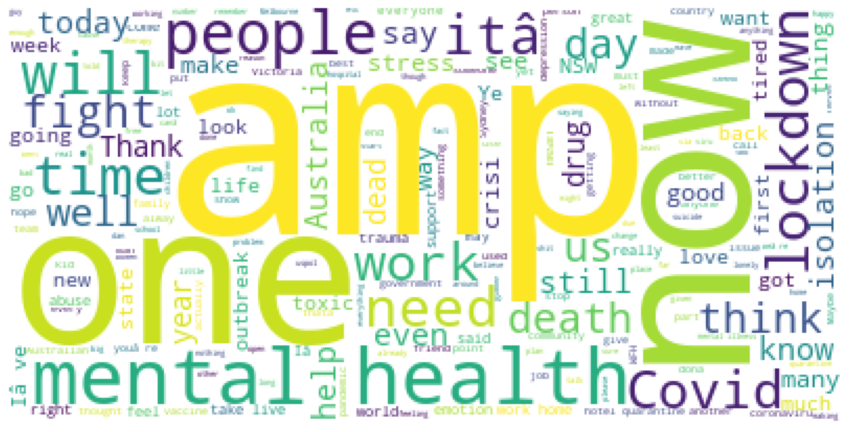

In [39]:
final_text = ' '.join(final_cleaning_sentences)

cloud = WordCloud(background_color="white")
cloud.generate(final_text)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off');
plt.savefig("#path")

df['content2']= final_text
df.head()

In [ ]:
df.to_csv('CLEAN_WORDS_aLL.csv')